# Exploratory Data Analysis (EDA)

Celem dzisiejszego ćwiczenia jest poznanie podstawowej metody zaznajamiania się z danymi i odpowiada na pytania:

- Czy możemy używać algorytmy uczenia maszynowego na naszych danych?
- Jakie są klasy i wartości w naszym zbiorze danych?
- Jakie algorytmy wybrać do naszego zbioru danych?

Odpowiedzi na te pytania dowiemy się poprzez scharakteryzowanie naszego zbioru i jego wizualizacje.

### Po co właściwie nam EDA?

Przede wszystkim, aby zrobić cokolwiek dobrego na danych, powinniśmy najpierw te dane poznać. W przeciwnym wypadku będziemy błądzić i popełniać błędy. Popełniając błędy w analizie biznesowej można doprowadzić firmę do niechcianych strat (a nawet upadku), gdy jej decyzje będą oparte na błędnych założeniach. EDA pozwala nam zdobyć pewien pogląd na dane, z którymi będziemy pracować. Końcowym efektem będzie pogląd na to, jak przeprowadzić proces uczenia maszynowego, aby dał dobre wyniki.

Co może się stać gdy EDA nie zrobimy:

- Stworzymy niedokładne modele,
- Stworzymy dokładne modele, ale na złych danych,
- Wybierzemy złe parametry do modelu,
- Źle będziemy zarządzać naszymi zasobami.

### Kroki EDA

1. Pobieramy zbiór danych (pliki, bazy danych, etc.),
2. Zapoznanie się z naszym zbiorem:
   - Ilość danych,
   - Jak wyglądają dane,
   - Podgląd początkowych i końcowych wierszy.
3. Głębsze zapoznanie się z danymi (wizualizacje, zapytania), 
4. Opisanie problemów z danymi:
   - Brakujące dane,
   - Wartości odstające,
   - Duplikaty.
5. Identyfikacja cech
6. Szukanie wzorców w danych

### Przygotowanie do zajęć

Aby zacząć pracę w `Jupyter Notebook` należy zainstalować paczkę za pomocą `pip` lub `conda`.

```
# Jeżeli korzystamy z domyślnej dystrybucji Python
pip install notebook

# Jeżeli korzystamy z dystrybucji Anaconda
conda install -c conda-forge notebook
```

Następnie w konsoli idziemy do folderu z naszym repozytorium i odpalamy komendę:

```
jupyter notebook
```

## Przykładowe EDA na danych COVID-19

Zaczniemy od importu bibliotek, które będziemy używać. Jeżeli czegoś nie masz zainstalowanego na swoim komputerze, pamiętaj by użyć komendy `pip` lub `conda install` w przypadku gdy używasz dystrybucji Anaconda.

In [1]:
# Działania na danych
import pandas as pd
import numpy as np
import scipy.stats as st
import missingno as msno

# Wizualizacja
import matplotlib.pyplot as plt
import seaborn as sns

# Setup
%matplotlib inline
sns.set()

In [2]:
# Załadujemy dane odnośnie Covid-19
# Link do źródła: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset/data
covid_data = pd.read_csv(
    'covid_19_data.csv',
    index_col='SNo',
    parse_dates=['ObservationDate', 'Last Update']
)

In [3]:
# Zacznijmy od sprawdzenia rozmiaru naszego datasetu.
print(f'Ilość wierszy: {covid_data.shape[0]}')
print(f'Ilość kolumn: {covid_data.shape[1]}')

Ilość wierszy: 15769
Ilość kolumn: 7


In [4]:
# Informacje o naszym zbiorze danych
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15769 entries, 1 to 15769
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ObservationDate  15769 non-null  datetime64[ns]
 1   Province/State   7940 non-null   object        
 2   Country/Region   15769 non-null  object        
 3   Last Update      15769 non-null  datetime64[ns]
 4   Confirmed        15769 non-null  float64       
 5   Deaths           15769 non-null  float64       
 6   Recovered        15769 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(2)
memory usage: 985.6+ KB


In [5]:
# Opiszemy dane by zobaczyć podstawowe statystyki wartości numerycznych
covid_data.describe()

,Confirmed,Deaths,Recovered
count,15769.000000,15769.000000,15769.000000
mean,2245.313336,121.459953,549.170271
std,11977.674574,1001.354370,4386.890810
min,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000
50%,76.000000,1.000000,1.000000
75%,525.000000,6.000000,43.000000
max,223691.000000,22170.000000,77000.000000


In [6]:
# Początek zbioru danych
covid_data.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [7]:
# Koniec zbioru danych
covid_data.tail()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
15765,2020-04-16,Wyoming,US,2020-04-16 23:38:19,296.0,2.0,0.0
15766,2020-04-16,Xinjiang,Mainland China,2020-04-16 23:38:19,76.0,3.0,73.0
15767,2020-04-16,Yukon,Canada,2020-04-16 23:38:19,8.0,0.0,0.0
15768,2020-04-16,Yunnan,Mainland China,2020-04-16 23:38:19,184.0,2.0,176.0
15769,2020-04-16,Zhejiang,Mainland China,2020-04-16 23:38:19,1268.0,1.0,1244.0


In [8]:
# Wartości kategoryczne
covid_data_categorical = covid_data.select_dtypes(include=[np.object])
covid_data_categorical.columns

Index(['Province/State', 'Country/Region'], dtype='object')

In [9]:
# Wartości numeryczne
covid_data_numeric = covid_data.select_dtypes(include=[np.number])
covid_data_numeric.columns

Index(['Confirmed', 'Deaths', 'Recovered'], dtype='object')

Z tych kilku komend dowiedzieliśmy się kilku przydatnych rzeczy:

- Informacji o wielkości naszego zbioru,
- 4 kolumny opisują wartości numeryczne,
- 3 kolumny opisują wartości kategoryczne,
- Kolumna `Province/State` zawiera brakujące wartości.

### Brakujące wartości

Brakujące wartości znaleźliśmy tylko w kolumnie `Province/State`.

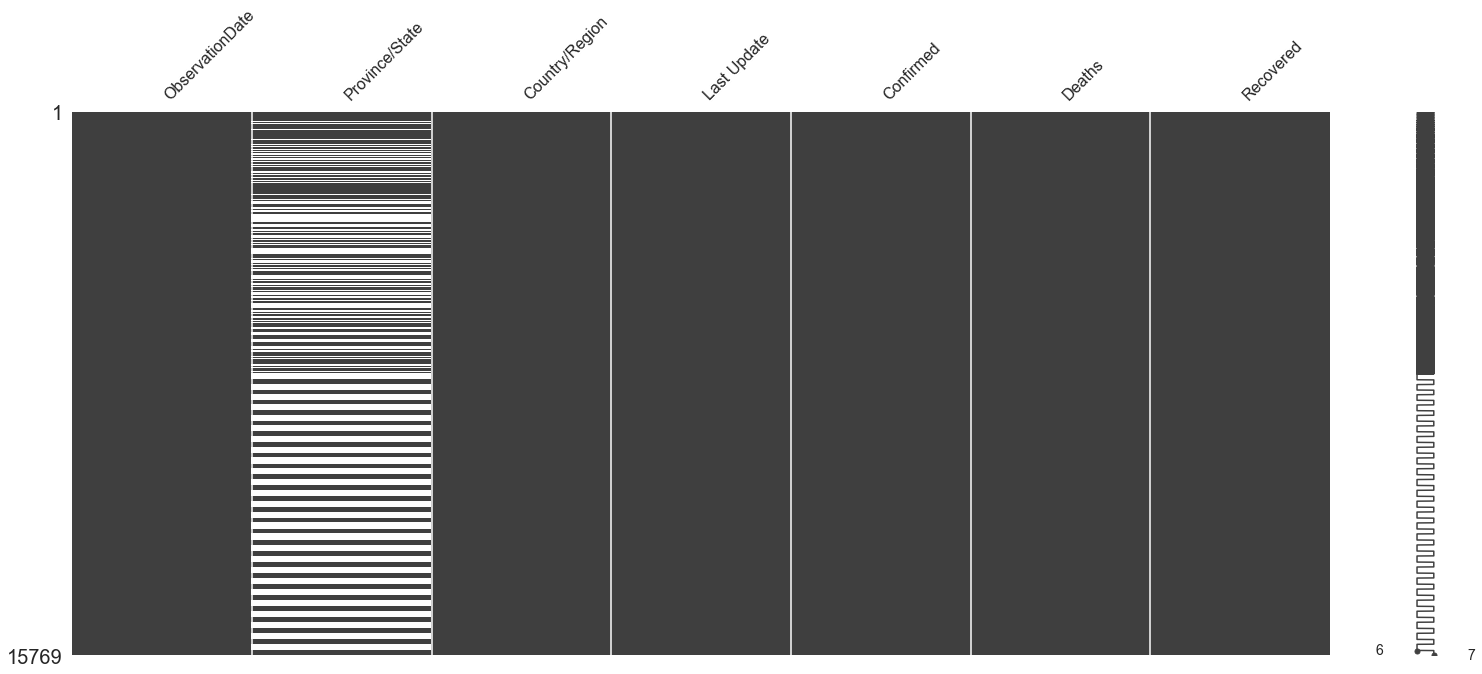

In [10]:
# Wyświetl jako matrix
msno.matrix(covid_data)

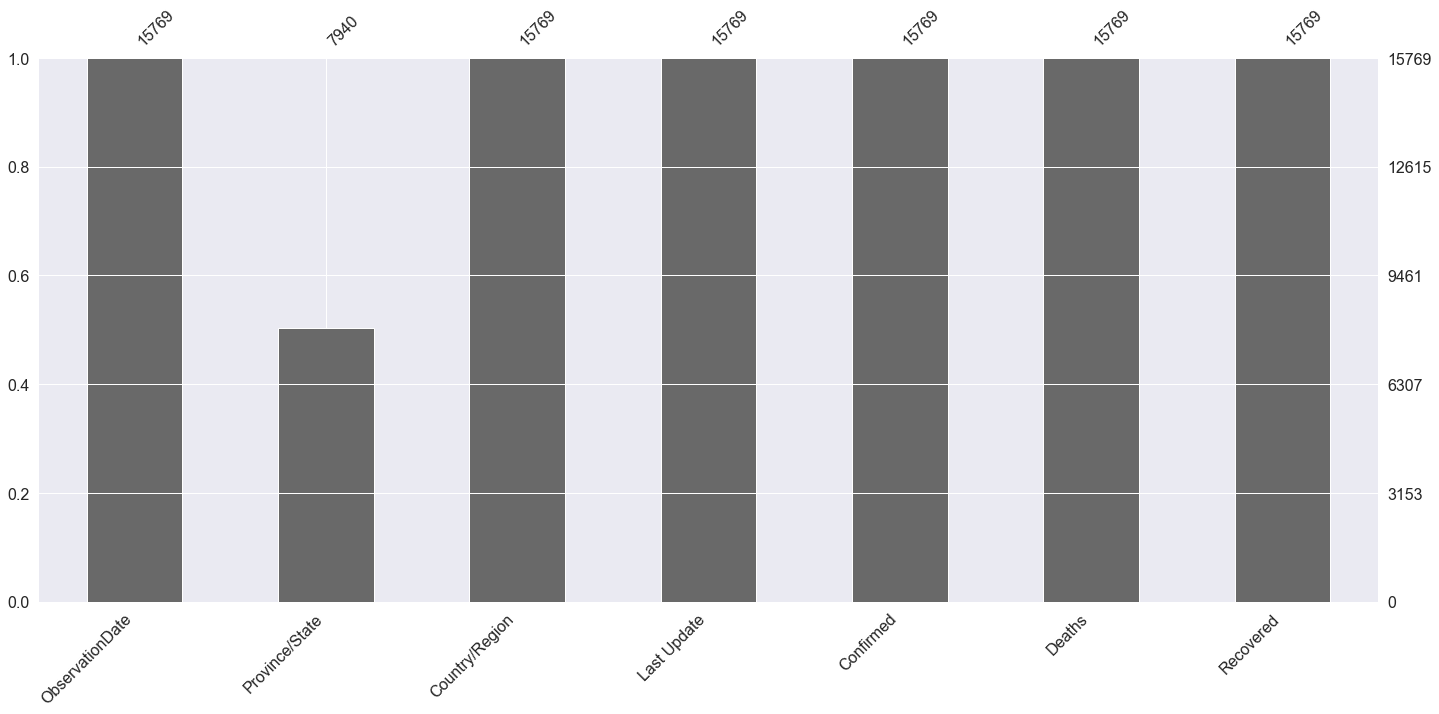

In [11]:
# Wyświetl jako bar plot
msno.bar(covid_data)

In [12]:
# Zobaczmy te puste wartości
covid_data[covid_data['Province/State'].isna()].head(20)

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
36,2020-01-22,NaN,Japan,2020-01-22 17:00:00,2.0,0.0,0.0
37,2020-01-22,NaN,Thailand,2020-01-22 17:00:00,2.0,0.0,0.0
38,2020-01-22,NaN,South Korea,2020-01-22 17:00:00,1.0,0.0,0.0
74,2020-01-23,NaN,Japan,2020-01-23 17:00:00,1.0,0.0,0.0
75,2020-01-23,NaN,Thailand,2020-01-23 17:00:00,3.0,0.0,0.0
76,2020-01-23,NaN,South Korea,2020-01-23 17:00:00,1.0,0.0,0.0
77,2020-01-23,NaN,Singapore,2020-01-23 17:00:00,1.0,0.0,0.0
78,2020-01-23,NaN,Philippines,2020-01-23 17:00:00,0.0,0.0,0.0
79,2020-01-23,NaN,Malaysia,2020-01-23 17:00:00,0.0,0.0,0.0


### Kurtoza i skośność

Fajnym sposobem by opisać rozkład naszych danych jest kurtoza i skośność. Pierwsze opisuje na ile nasze dane koncentrują się wg. średniej wartości. Skośność z kolei definiuje jak wyniki danej zmiennej kształtują się wokół średniej wartości (lewa, prawa, środek).

Znając rozwój Covid-19 możemy z łatwością stwierdzić, że wszystkie wartości będą na prawo od średniej, ale i tak zobaczmy jak to wygląda w liczbach.

In [13]:
# Kurtoza
covid_data.kurt()

Confirmed    109.198790
Deaths       221.114812
Recovered    151.282686
dtype: float64

In [14]:
# Skośność
covid_data.skew()

Confirmed     9.582679
Deaths       13.884226
Recovered    11.812883
dtype: float64

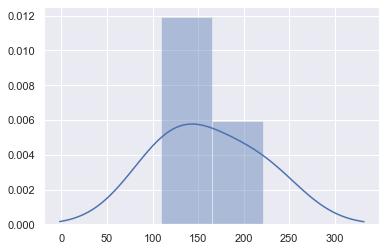

In [15]:
# Wykres kurtozy
sns.distplot(covid_data.kurt())

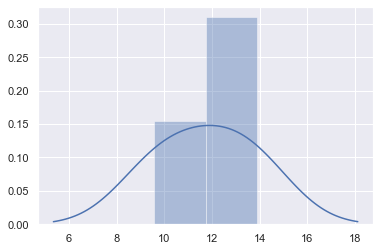

In [16]:
# Wykres skośności
sns.distplot(covid_data.skew())

### Korelacje

Korelacje pozwalają nam zobaczyć jaki wpływ mają na siebie poszczególne wartości w bazie danych. Korelacja może być:

- Dodatnia (jeżeli jedna wartość rośnie, to druga wartość rośnie),
- Ujemna (jeżeli jedna wartość rośnie, to druga wartość maleje),
- Brak korelacji.

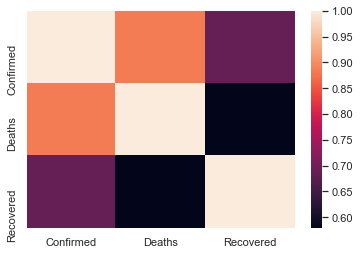

In [17]:
# Korelacje między wartościami numerycznymi
sns.heatmap(covid_data.corr())

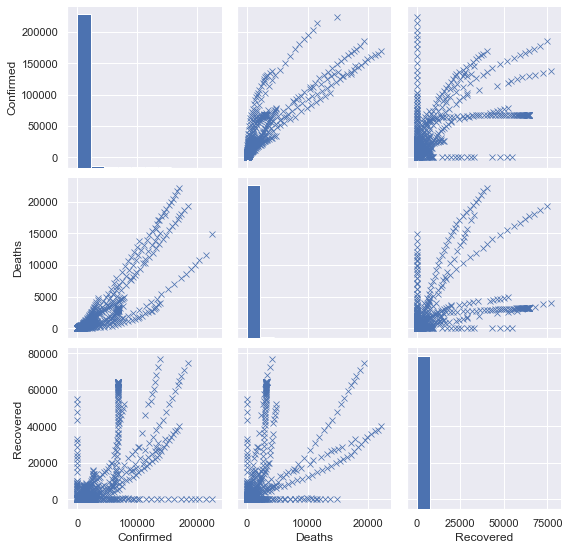

In [18]:
# Pair plot pokazujący jak zachowują się wartości względem siebie
sns.pairplot(data=covid_data, markers='x')

### Time series

Time series to specjalny rodzaj danych, których wartości zmieniają się w czasie. Dane, które tutaj mamy można tak skategoryzować za pomocą kolumny `ObservationDate`. Zobaczmy jak wyglądały wartości potwierdzeń, śmierci oraz wyzdrowień dla Polski.

In [19]:
# Dane dla Polski
poland_data = covid_data[covid_data['Country/Region'] == 'Poland']
poland_data.head(10)

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
3373,2020-03-04,NaN,Poland,2020-03-04 15:13:18,1.0,0.0,0.0
3541,2020-03-05,NaN,Poland,2020-03-04 15:13:18,1.0,0.0,0.0
3666,2020-03-06,NaN,Poland,2020-03-06 16:43:04,5.0,0.0,0.0
3871,2020-03-07,NaN,Poland,2020-03-06 16:43:04,5.0,0.0,0.0
4087,2020-03-08,NaN,Poland,2020-03-08 21:13:10,11.0,0.0,0.0
4334,2020-03-09,NaN,Poland,2020-03-09 11:33:10,16.0,0.0,0.0
4595,2020-03-10,NaN,Poland,2020-03-10 20:13:07,22.0,0.0,0.0
4801,2020-03-11,NaN,Poland,2020-03-11 21:13:21,31.0,0.0,0.0
5008,2020-03-12,NaN,Poland,2020-03-12 13:33:02,49.0,1.0,0.0


[None, None, None, None, None, None, None, None, None, None, None, None]

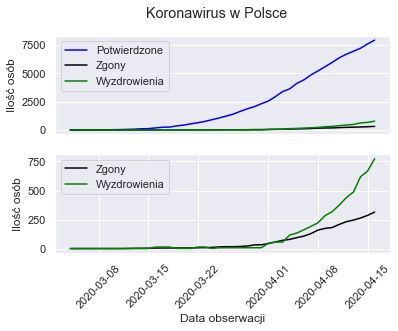

In [20]:
# Wizualizacja danych czasowych
figure, ax = plt.subplots(2,1)
sns.lineplot(
    x='ObservationDate',
    y='Confirmed',
    data=poland_data,
    label='Potwierdzone',
    color='blue',
    ax=ax[0],
)
sns.lineplot(
    x='ObservationDate',
    y='Deaths',
    data=poland_data,
    label='Zgony',
    color='black',
    ax=ax[0],
)
sns.lineplot(
    x='ObservationDate',
    y='Recovered',
    data=poland_data,
    label='Wyzdrowienia',
    color='green',
    ax=ax[0]
)

# Bez confirmed, by było lepiej widać
sns.lineplot(
    x='ObservationDate',
    y='Deaths',
    data=poland_data,
    label='Zgony',
    color='black',
    ax=ax[1],
)
sns.lineplot(
    x='ObservationDate',
    y='Recovered',
    data=poland_data,
    label='Wyzdrowienia',
    color='green',
    ax=ax[1]
)

# Poprawienie wizualizacji
figure.suptitle('Koronawirus w Polsce')
ax[0].set_xlabel('')
ax[1].set_xlabel('Data obserwacji')
ax[0].set_ylabel('Ilość osób')
ax[1].set_ylabel('Ilość osób')
ax[0].get_xaxis().set_ticks([])
plt.setp(ax[1].get_xticklabels(), rotation=45)

# Zadania

1. Wejdź na stronę [Kaggle](https://www.kaggle.com/datasets) i wybierz dowolny ciekawy dla Ciebie dataset.
2. Przeprowadź Exploratory Data Analysis na wybranych danych.
3. Pamiętaj by zawrzeć wszystko czego się dzisiaj nauczyłeś.
4. Zamieść wyniki w swoim repozytorium Github.